In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Balaji Fast Food Sales.csv')


In [4]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [5]:
df['date'] = df['date'].str.replace('/', '-')
print(df['date'])
df.head(10)

0      07-03-2022
1       8-23-2022
2      11-20-2022
3      02-03-2023
4      10-02-2022
          ...    
995     3-19-2023
996     9-20-2022
997     1-26-2023
998     8-27-2022
999     5-29-2022
Name: date, Length: 1000, dtype: object


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8-23-2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11-20-2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11-14-2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12-22-2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9-16-2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [6]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

# Extract the month and year from the 'date' column
df['month_year'] = df['date'].dt.to_period('M')
df['month_year']
# Group the data by month and sum the 'total' column to get monthly sales
monthly_sales = df.groupby('month_year')['transaction_amount'].sum()
monthly_sales




,transaction_amount
month_year,
2022-04,17670
2022-05,26570
2022-06,17335
2022-07,19490
2022-08,22305
2022-09,18640
2022-10,27205
2022-11,22900
2022-12,23460


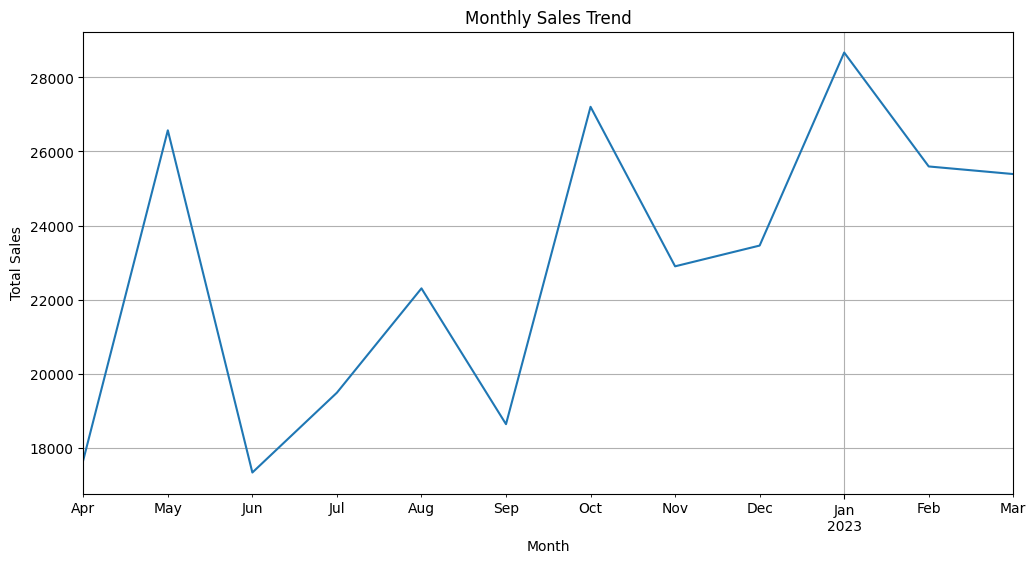

In [7]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

In [8]:
# Extract the month and year from the 'date' column
df['daily'] = df['date'].dt.to_period('D')
df['daily']
# Group the data by month and sum the 'total' column to get monthly sales
daily_sales = df.groupby('daily')['transaction_amount'].sum()
daily_sales

,transaction_amount
daily,
2022-04-01,420
2022-04-02,1500
2022-04-03,480
2022-04-04,2500
2022-04-05,100
...,...
2023-03-25,840
2023-03-26,280
2023-03-27,1040


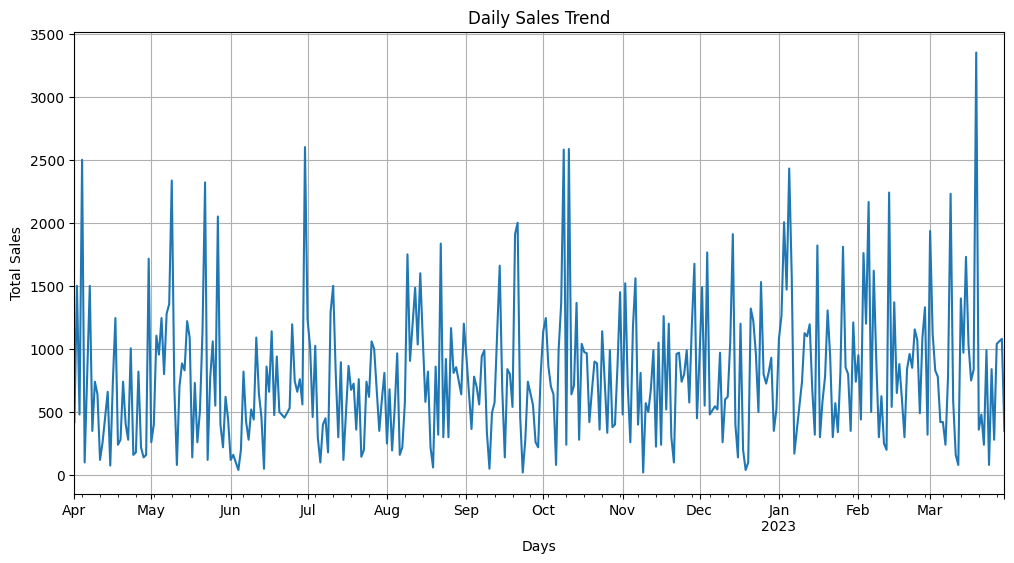

In [9]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.grid(True)
plt.show()

In [10]:
# Sort the daily sales in descending order and get the top 10 days
top_10_days = daily_sales.sort_values(ascending=False).head(10)

print(top_10_days)


daily
2023-03-19    3350
2022-06-30    2600
2022-10-11    2585
2022-10-09    2580
2022-04-04    2500
2023-01-05    2430
2022-05-09    2335
2022-05-22    2320
2023-02-13    2240
2023-03-09    2230
Freq: D, Name: transaction_amount, dtype: int64


In [11]:
# Convert the index of top_10_days (which are Period objects) to datetime objects
top_10_days_dates = top_10_days.index.to_timestamp()

# Get the day of the week for each date
days_of_week = top_10_days_dates.strftime('%A')

# Print the days of the week
print(days_of_week)


Index(['Sunday', 'Thursday', 'Tuesday', 'Sunday', 'Monday', 'Thursday',
       'Monday', 'Sunday', 'Monday', 'Thursday'],
      dtype='object', name='daily')


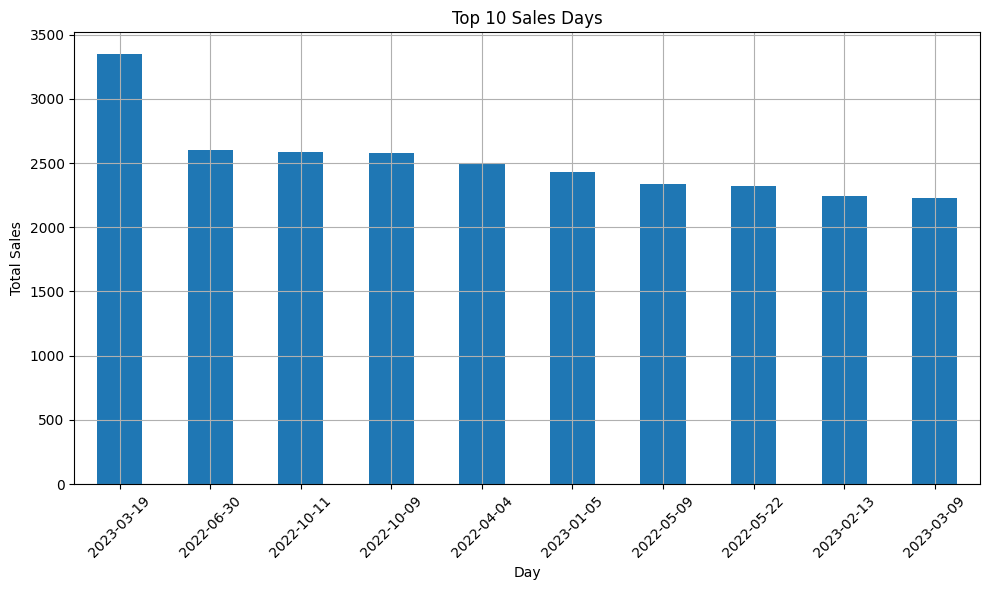

In [13]:
# prompt: make it a bar chart instead

import matplotlib.pyplot as plt
# Plot the top 10 days as a bar chart
plt.figure(figsize=(10, 6))
top_10_days.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Top 10 Sales Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Sort the daily sales in descending order and get the top 10 days
top_10_days = daily_sales.sort_values(ascending=False).head(10)

print(top_10_days)

# Convert the index of top_10_days (which are Period objects) to datetime objects
top_10_days_dates = top_10_days.index.to_timestamp()

# Get the day of the week for each date
days_of_week = top_10_days_dates.strftime('%A')

# Print the days of the week
print(days_of_week)


daily
2023-03-19    3350
2022-06-30    2600
2022-10-11    2585
2022-10-09    2580
2022-04-04    2500
2023-01-05    2430
2022-05-09    2335
2022-05-22    2320
2023-02-13    2240
2023-03-09    2230
Freq: D, Name: transaction_amount, dtype: int64
Index(['Sunday', 'Thursday', 'Tuesday', 'Sunday', 'Monday', 'Thursday',
       'Monday', 'Sunday', 'Monday', 'Thursday'],
      dtype='object', name='daily')


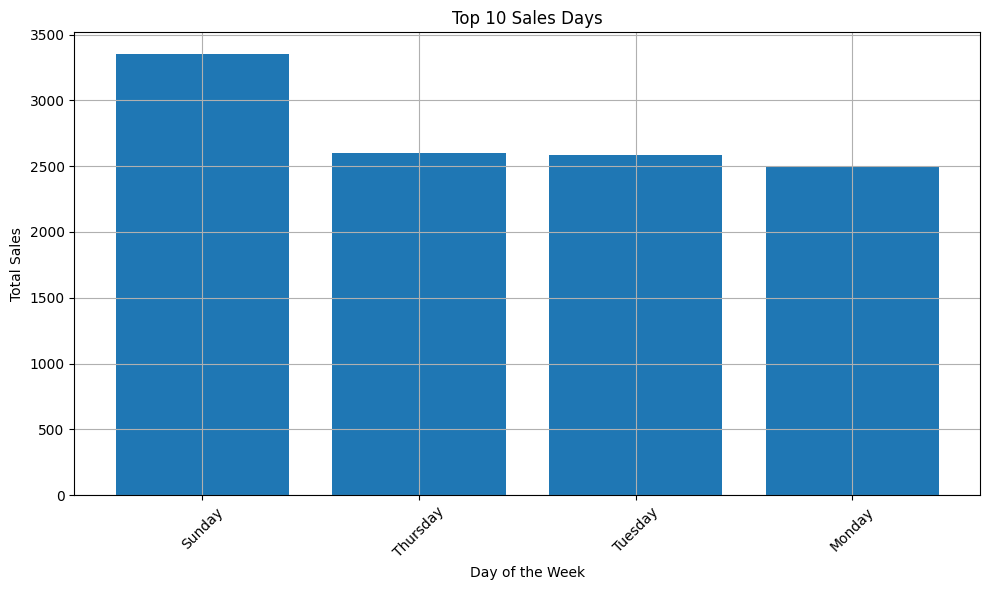

In [15]:
# Plot the top 10 days as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, top_10_days.values)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Top 10 Sales Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


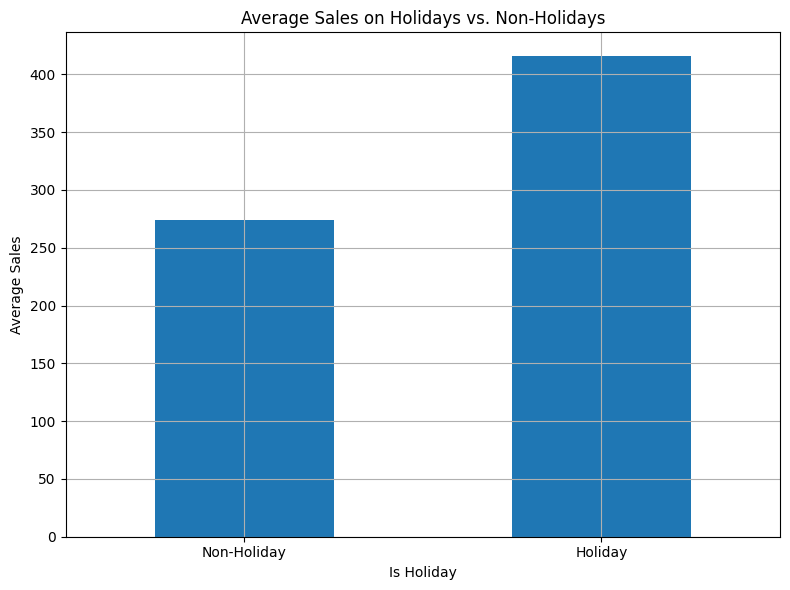

In [21]:
import matplotlib.pyplot as plt
# Create a new column 'is_holiday' and initialize it to False
df['is_holiday'] = False

holidays = [
    '2023-01-01',  # New Year's Day
    '2023-01-16',  # Martin Luther King Jr. Day
    '2023-02-20',  # Presidents' Day
    '2023-05-29',  # Memorial Day
    '2023-07-04',  # Independence Day
    '2023-09-04',  # Labor Day
    '2023-10-09',  # Columbus Day
    '2023-11-11',  # Veterans Day
    '2023-11-23',  # Thanksgiving Day
    '2023-12-25',  # Christmas Day
]

# Mark dates in the 'holidays' list as holidays in the DataFrame
df['is_holiday'] = df['date'].dt.strftime('%Y-%m-%d').isin(holidays)

# Group the data by 'is_holiday' and calculate the average sales
average_sales_by_holiday = df.groupby('is_holiday')['transaction_amount'].mean()

# Plot the average sales on holidays vs. non-holidays
plt.figure(figsize=(8, 6))
average_sales_by_holiday.plot(kind='bar')
plt.xlabel('Is Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
